##In this notebook, I have applied 4 different Machine Learning models and compared their performance

##Step 1: Load the data and import necessary packages

In [ ]:
!cp drive/My\ Drive/finaldata.csv /content

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sn

In [ ]:
data = pd.read_csv('finaldata.csv')

In [ ]:
data.head()

,Unnamed: 0,Product Name,Description,Image,Category
0,0,Alisha Solid Women's Cycling Shorts,key features alisha solid women s cycling shor...,"[""http://img5a.flixcart.com/image/short/u/4/a/...",Clothing
1,1,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric double sofa bed finish col...,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",Furniture
2,2,AW Bellies,key features aw bellies sandals wedges heel ca...,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",Footwear
3,3,Alisha Solid Women's Cycling Shorts,key features alisha solid women s cycling shor...,"[""http://img5a.flixcart.com/image/short/6/2/h/...",Clothing
4,6,Alisha Solid Women's Cycling Shorts,key features alisha solid women s cycling shor...,"[""http://img6a.flixcart.com/image/short/p/j/z/...",Clothing


In [ ]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

##Step 2: Label Encode the Categories and 80:20 split into training and validation sets

In [ ]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [ ]:
trainx,testx,trainy,testy = train_test_split(data['Description'],data['Category'],stratify = data['Category'])

In [ ]:
n = data['Category'].unique().max()+1

In [ ]:
label_names = []
for i in range(n):
  label_names.append(le.inverse_transform(np.array(i).reshape(-1,1))[0])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Step 3: Use TF-IDF vectorizer to convert input sentences into vectors

In [ ]:
vect = TfidfVectorizer()

In [ ]:
train_vect = vect.fit_transform(trainx)
test_vect = vect.transform(testx)

##Step 4: Train on ML algorithms (With Results and Analysis)

####4.1 Random Forest

Create parameter grid to initialize grid search on Random Forest

Fit the model on given data

In [ ]:
params = { 
    'n_estimators': [100,150,200,250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
rf = RandomForestClassifier()

In [ ]:
rf_grid = GridSearchCV(rf,params,scoring = 'f1_weighted',cv = 5)

In [ ]:
rf_grid.fit(train_vect,trainy)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Predict on validation data using Random Forest

In [ ]:
preds = rf_grid.predict(test_vect)

####Use classification report to evaluate the performance of the model

It can be observed that although, RF achieves better f1 score than deep learning models but, this model has clearly overfit on the training dataset which would be an issue if the size of the data is increased.

In [ ]:
print(classification_report(testy,preds,target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       0.98      0.99      0.98       254
                        Baby Care       1.00      0.69      0.82       121
            Bags, Wallets & Belts       0.95      0.89      0.92        66
         Beauty and Personal Care       0.99      0.95      0.97       178
            Cameras & Accessories       1.00      0.95      0.98        21
                         Clothing       0.96      1.00      0.98      1549
                        Computers       0.88      0.90      0.89       145
                          Eyewear       1.00      1.00      1.00        12
                         Footwear       0.99      0.94      0.96       309
                        Furniture       0.98      0.98      0.98        45
Health & Personal Care Appliances       1.00      0.82      0.90        11
       Home Decor & Festive Needs       0.95      1.00      0.97       233
                  Home F

In [ ]:
print(classification_report(trainy,rf_grid.predict(train_vect),target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       1.00      1.00      1.00       760
                        Baby Care       1.00      1.00      1.00       362
            Bags, Wallets & Belts       1.00      1.00      1.00       199
         Beauty and Personal Care       1.00      1.00      1.00       534
            Cameras & Accessories       1.00      1.00      1.00        64
                         Clothing       1.00      1.00      1.00      4648
                        Computers       1.00      1.00      1.00       435
                          Eyewear       1.00      1.00      1.00        35
                         Footwear       1.00      1.00      1.00       928
                        Furniture       1.00      1.00      1.00       137
Health & Personal Care Appliances       1.00      1.00      1.00        32
       Home Decor & Festive Needs       1.00      1.00      1.00       699
                  Home F

####Plotting the ROC Curve

analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [ ]:
fpr,tpr,thresh = dict(),dict(),dict()
test_probs = rf_grid.predict_proba(test_vect)
for i in range(n):    
    fpr[i], tpr[i], thresh[i] = roc_curve(testy, test_probs[:,i], pos_label=i)
plt.figure(figsize = (10,10))
for i in range(n):
  plt.plot(fpr[i],tpr[i],label = label_names[i])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

####Plotting the confusion matrix for training and validation sets

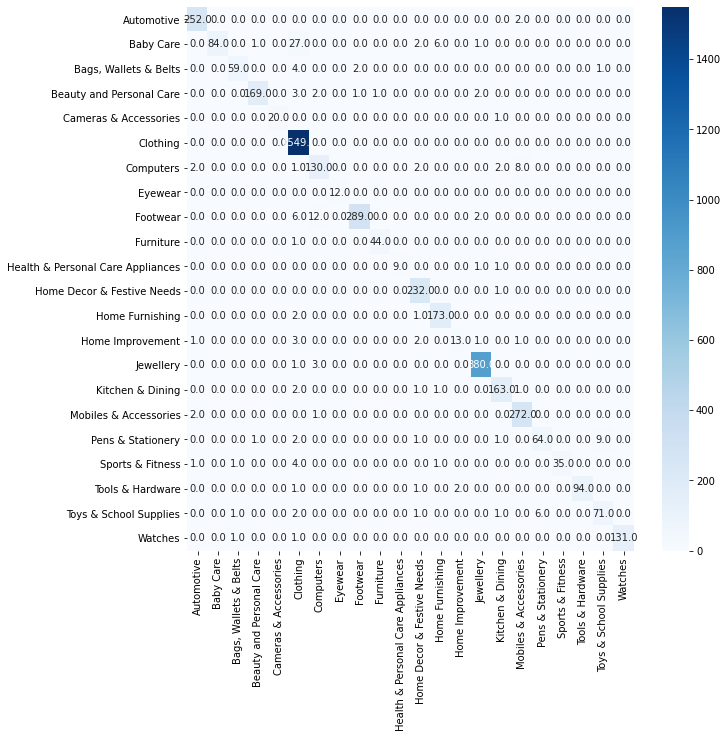

In [ ]:
cm = confusion_matrix(testy,preds)
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

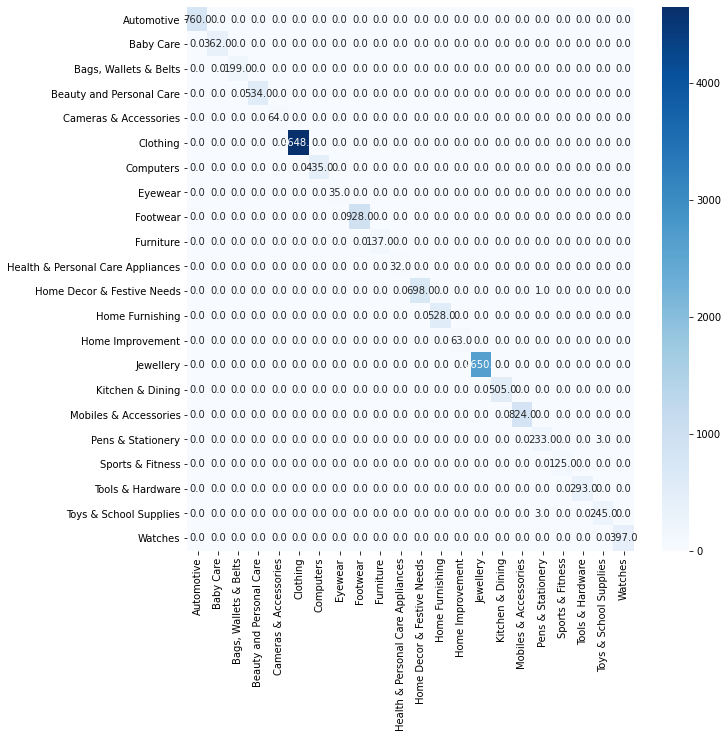

In [ ]:
cm = confusion_matrix(trainy,rf_grid.predict(train_vect))
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

####Printing the best estimator

In [ ]:
print('Best Estimator = ',rf_grid.best_estimator_,'\nBest Parameters = ',rf_grid.best_params_,'\nBest Score = ',rf_grid.best_score_)

Best Estimator =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best Parameters =  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200} 
Best Score =  0.9576459730308093


###4.2 Initializing Naive Bayes classifier and fitting on given data

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(train_vect,trainy)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
preds = nb.predict(test_vect)

Naive Bayes evaluation using classification report

NB classifier has a poor performance and also overfits on the training dataset

In [ ]:
print(classification_report(testy,preds,target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       0.94      0.96      0.95       254
                        Baby Care       1.00      0.36      0.53       121
            Bags, Wallets & Belts       0.89      0.12      0.21        66
         Beauty and Personal Care       0.99      0.66      0.79       178
            Cameras & Accessories       0.00      0.00      0.00        21
                         Clothing       0.87      1.00      0.93      1549
                        Computers       0.99      0.67      0.80       145
                          Eyewear       1.00      0.08      0.15        12
                         Footwear       0.99      0.86      0.92       309
                        Furniture       0.94      0.69      0.79        45
Health & Personal Care Appliances       0.00      0.00      0.00        11
       Home Decor & Festive Needs       0.93      0.94      0.94       233
                  Home F

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(trainy,nb.predict(train_vect),target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       1.00      1.00      1.00       760
                        Baby Care       1.00      1.00      1.00       362
            Bags, Wallets & Belts       1.00      1.00      1.00       199
         Beauty and Personal Care       1.00      1.00      1.00       534
            Cameras & Accessories       1.00      1.00      1.00        64
                         Clothing       1.00      1.00      1.00      4648
                        Computers       1.00      1.00      1.00       435
                          Eyewear       1.00      1.00      1.00        35
                         Footwear       1.00      1.00      1.00       928
                        Furniture       1.00      1.00      1.00       137
Health & Personal Care Appliances       1.00      1.00      1.00        32
       Home Decor & Festive Needs       1.00      1.00      1.00       699
                  Home F

Plotting the ROC Curve for Naive Bayes Classifier

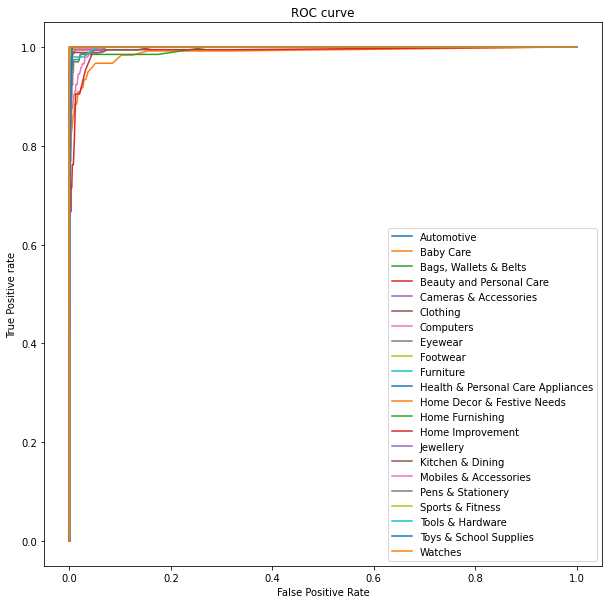

In [ ]:
fpr,tpr,thresh = dict(),dict(),dict()
test_probs = rf_grid.predict_proba(test_vect)
for i in range(n):    
    fpr[i], tpr[i], thresh[i] = roc_curve(testy, test_probs[:,i], pos_label=i)
plt.figure(figsize = (10,10))
for i in range(n):
  plt.plot(fpr[i],tpr[i],label = label_names[i])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

####Plotting confusion matrix for training and validation sets

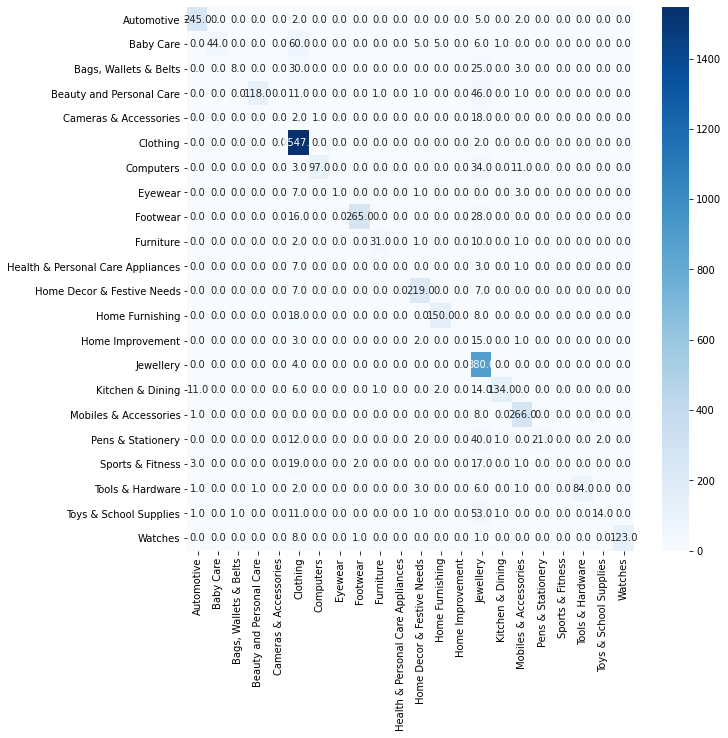

In [ ]:
cm = confusion_matrix(testy,preds)
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

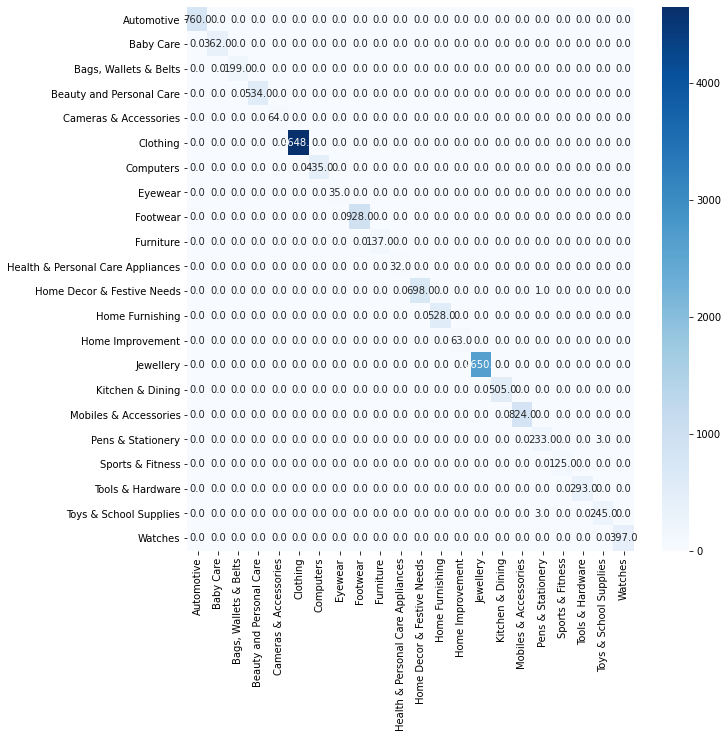

In [ ]:
cm = confusion_matrix(trainy,nb.predict(train_vect))
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

####4.3 Initializing SVM and fitting on given data

In [ ]:
svm = SVC()
param_grid = {'C':[0.5,1.0,1.5],
              'kernel':['linear','poly','sigmoid']}

In [ ]:
svm_grid = GridSearchCV(svm,param_grid,scoring = 'f1_weighted',cv = 5)

In [ ]:
svm_grid.fit(train_vect,trainy)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1.0, 1.5],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [ ]:
preds = svm_grid.predict(test_vect)

Evaluating SVM classifier:

Good performance on validation dataset but, overfitting can still be seen on the training data

In [ ]:
print(classification_report(testy,preds,target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       0.99      0.99      0.99       254
                        Baby Care       0.94      0.87      0.90       121
            Bags, Wallets & Belts       0.94      0.94      0.94        66
         Beauty and Personal Care       0.99      0.98      0.99       178
            Cameras & Accessories       0.95      1.00      0.98        21
                         Clothing       0.99      1.00      0.99      1549
                        Computers       0.96      0.94      0.95       145
                          Eyewear       1.00      1.00      1.00        12
                         Footwear       1.00      0.99      1.00       309
                        Furniture       0.96      1.00      0.98        45
Health & Personal Care Appliances       1.00      1.00      1.00        11
       Home Decor & Festive Needs       0.96      1.00      0.98       233
                  Home F

In [ ]:
print(classification_report(trainy,svm_grid.predict(train_vect),target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       1.00      1.00      1.00       760
                        Baby Care       0.97      0.96      0.96       362
            Bags, Wallets & Belts       0.98      1.00      0.99       199
         Beauty and Personal Care       1.00      1.00      1.00       534
            Cameras & Accessories       1.00      1.00      1.00        64
                         Clothing       1.00      1.00      1.00      4648
                        Computers       1.00      0.99      0.99       435
                          Eyewear       1.00      1.00      1.00        35
                         Footwear       1.00      1.00      1.00       928
                        Furniture       0.99      1.00      1.00       137
Health & Personal Care Appliances       1.00      1.00      1.00        32
       Home Decor & Festive Needs       1.00      1.00      1.00       699
                  Home F

SVM is not having predict_proba feature hence, ROC curve cannot be plotted

####Plotting confusion matrix for SVM on training and validation data

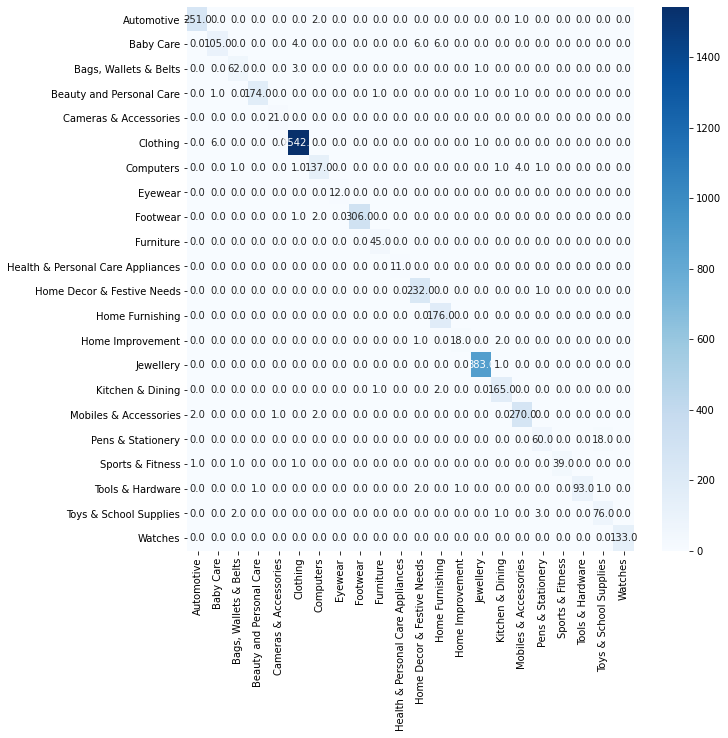

In [ ]:
cm = confusion_matrix(testy,preds)
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

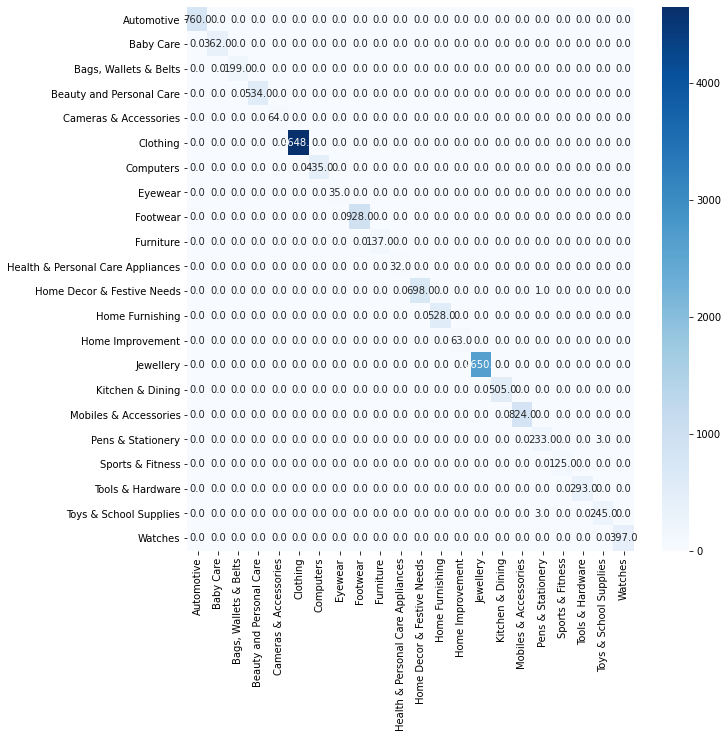

In [ ]:
cm = confusion_matrix(trainy,svm_grid.predict(train_vect))
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

####4.4 Initializing KNN classifier and fitting on given data

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[2,4,6,8,10],
              'algorithm':['ball_tree', 'kd_tree']}

In [ ]:
knn_grid = GridSearchCV(knn,param_grid,scoring = 'f1_weighted',cv = 5)

We received a warning: Due to sparse input, the model is unable to use tree algorithm and has switched to brute force algorithm

In [ ]:
knn_grid.fit(train_vect,trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/usr/local/lib/python3.7/dist-packages/sklear

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [2, 4, 6, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [ ]:
preds = knn_grid.predict(test_vect)

In [ ]:
print(classification_report(testy,preds,target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       0.95      0.98      0.97       254
                        Baby Care       0.84      0.80      0.82       121
            Bags, Wallets & Belts       0.80      0.95      0.87        66
         Beauty and Personal Care       0.94      0.93      0.93       178
            Cameras & Accessories       0.95      1.00      0.98        21
                         Clothing       0.98      0.99      0.98      1549
                        Computers       0.98      0.92      0.95       145
                          Eyewear       0.92      1.00      0.96        12
                         Footwear       0.99      0.97      0.98       309
                        Furniture       0.92      1.00      0.96        45
Health & Personal Care Appliances       1.00      1.00      1.00        11
       Home Decor & Festive Needs       0.96      0.94      0.95       233
                  Home F

In [ ]:
print(classification_report(trainy,knn_grid.predict(train_vect),target_names=label_names))

                                   precision    recall  f1-score   support

                       Automotive       0.97      0.99      0.98       760
                        Baby Care       0.85      0.90      0.87       362
            Bags, Wallets & Belts       0.92      0.97      0.95       199
         Beauty and Personal Care       0.94      0.97      0.95       534
            Cameras & Accessories       0.97      0.97      0.97        64
                         Clothing       0.99      0.99      0.99      4648
                        Computers       0.97      0.96      0.96       435
                          Eyewear       0.97      1.00      0.99        35
                         Footwear       0.99      0.98      0.99       928
                        Furniture       0.99      0.98      0.98       137
Health & Personal Care Appliances       0.94      0.91      0.92        32
       Home Decor & Festive Needs       0.96      0.97      0.97       699
                  Home F

####Plotting ROC Curve for KNN

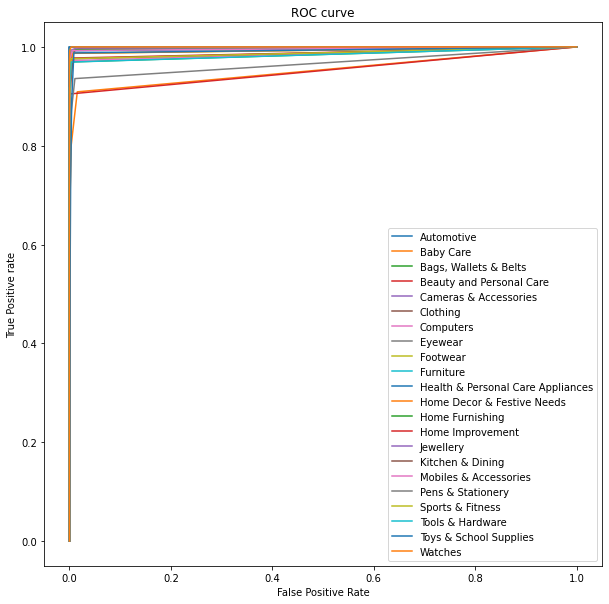

In [ ]:
fpr,tpr,thresh = dict(),dict(),dict()
test_probs = knn_grid.predict_proba(test_vect)
for i in range(n):    
    fpr[i], tpr[i], thresh[i] = roc_curve(testy, test_probs[:,i], pos_label=i)
plt.figure(figsize = (10,10))
for i in range(n):
  plt.plot(fpr[i],tpr[i],label = label_names[i])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

####Plotting confusion matrix on training and validation data

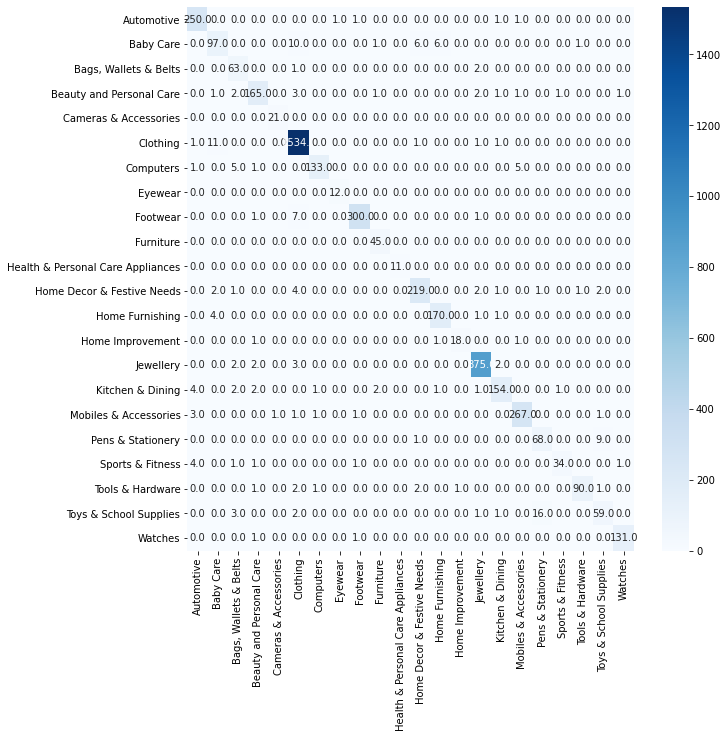

In [ ]:
cm = confusion_matrix(testy,preds)
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

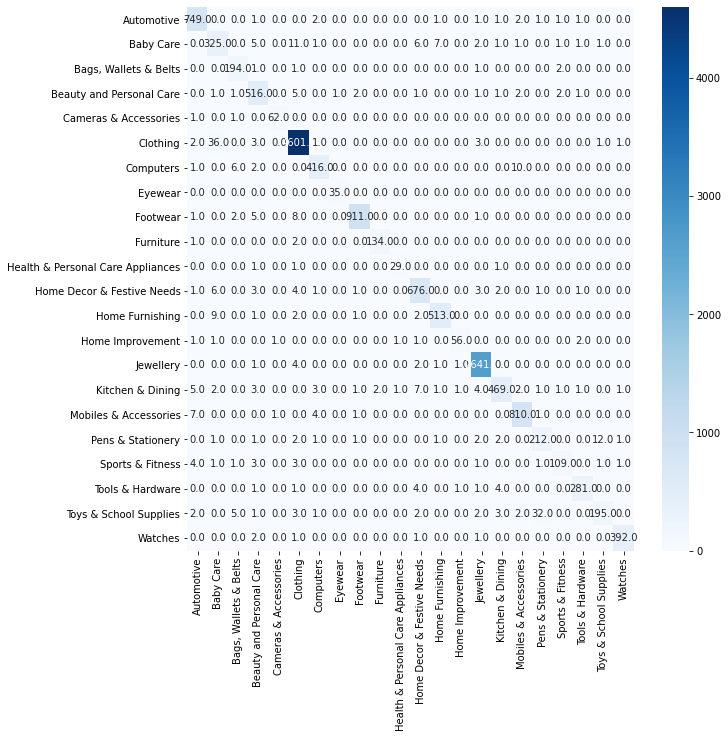

In [ ]:
cm = confusion_matrix(trainy,knn_grid.predict(train_vect))
plt.figure(figsize=(10,10))
sn.heatmap(cm,cmap = 'Blues',annot = True,fmt = '.1f',xticklabels = label_names,yticklabels=label_names)

##Step 5: Saving the ML models using pickle and storing them to Google Drive

In [ ]:
import pickle

In [ ]:
pickle.dump(rnn_grid,open('rf.sav','wb'))
pickle.dump(knn_grid,open('knn.sav','wb'))
pickle.dump(svn_grid,open('svm.sav','wb'))
pickle.dump(nb_grid,open('.sav','wb'))

In [ ]:
!cp knn.sav drive/My\ Drive/
!cp rf.sav drive/My\ Drive/
!cp svm.sav drive/My\ Drive/
!cp nb.sav drive/My\ Drive/

###Conclusion: ML models provide better f1 score on this dataset since, the size of the data is small. However, the models are overfitting on Training data which will be a major issue when the size of data is increased

The best result is attained by SVM classifier (96% Macro Average)

###Future Scope: Use Boosted models such as AdaBoost, XGBoost, CatBoost, etc

###References:

1. https://scikit-learn.org/stable/modules/model_evaluation.html
2. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/